In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets download imano00/dataset3modified


 99% 112M/113M [00:06<00:00, 21.7MB/s]
100% 113M/113M [00:06<00:00, 18.8MB/s]


In [6]:
# Put on the same directory
from zipfile import ZipFile

# specifying the name of the zip file
file = "dataset3modified.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip:
    # list all the contents of the zip file
    zip.printdir()

    # extract all files
    print('extraction...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
dataset(3) - modified/images/train/happy/Training_48989755.jpg 2022-12-17 10:41:58         1883
dataset(3) - modified/images/train/happy/Training_48992868.jpg 2022-12-17 10:41:58         1624
dataset(3) - modified/images/train/happy/Training_49022061.jpg 2022-12-17 10:41:58         1518
dataset(3) - modified/images/train/happy/Training_49025649.jpg 2022-12-17 10:41:58         1393
dataset(3) - modified/images/train/happy/Training_49026175.jpg 2022-12-17 10:41:58         1730
dataset(3) - modified/images/train/happy/Training_49026387.jpg 2022-12-17 10:41:58         1447
dataset(3) - modified/images/train/happy/Training_49036137.jpg 2022-12-17 10:41:58         1585
dataset(3) - modified/images/train/happy/Training_49044908.jpg 2022-12-17 10:41:58         1794
dataset(3) - modified/images/train/happy/Training_49050094.jpg 2022-12-17 10:41:58         1617
dataset(3) - modified/images/train/happy/Training_49054954.jpg 2022-12-17 10:41:58   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
dataset(3) - modified/images/validation/fear/886.jpg 2022-12-17 10:42:50         1448
dataset(3) - modified/images/validation/fear/9037.jpg 2022-12-17 10:42:50         1784
dataset(3) - modified/images/validation/fear/9040.jpg 2022-12-17 10:42:50         1765
dataset(3) - modified/images/validation/fear/9101.jpg 2022-12-17 10:42:50         1611
dataset(3) - modified/images/validation/fear/911.jpg 2022-12-17 10:42:50         1492
dataset(3) - modified/images/validation/fear/9179.jpg 2022-12-17 10:42:50         1575
dataset(3) - modified/images/validation/fear/9205.jpg 2022-12-17 10:42:50         1551
dataset(3) - modified/images/validation/fear/9232.jpg 2022-12-17 10:42:50         1538
dataset(3) - modified/images/validation/fear/9251.jpg 2022-12-17 10:42:50         1708
dataset(3) - modified/images/validation/fear/9261.jpg 2022-12-17 10:42:50         1314
dataset(3) - modified/images/validation/fear/9281.jpg 2022-12-17 10:42:50        

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [44]:

train_set = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/dataset(3) - modified/images/train',
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/dataset(3) - modified/images/validation',
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=False)



Found 58454 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [45]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.22))

model.add(Dense(7, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_14 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_14 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

In [46]:
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [reduce_learningrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=30,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/30
456/456 [==============================] - 72s 147ms/step - loss: 1.6618 - accuracy: 0.3610 - val_loss: 1.5411 - val_accuracy: 0.4169 - lr: 0.0010
Epoch 2/30
456/456 [==============================] - 36s 79ms/step - loss: 1.2594 - accuracy: 0.5182 - val_loss: 1.4148 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 3/30
456/456 [==============================] - 38s 82ms/step - loss: 1.1241 - accuracy: 0.5736 - val_loss: 1.1362 - val_accuracy: 0.5696 - lr: 0.0010
Epoch 4/30
456/456 [==============================] - 38s 83ms/step - loss: 1.0357 - accuracy: 0.6098 - val_loss: 1.1760 - val_accuracy: 0.5653 - lr: 0.0010
Epoch 5/30
456/456 [==============================] - 35s 76ms/step - loss: 0.9648 - accuracy: 0.6382 - val_loss: 1.0034 - val_accuracy: 0.6153 - lr: 0.0010
Epoch 6/30
456/456 [==============================] - 34s 75ms/step - loss: 0.8906 - accuracy: 0.6673 - val_loss: 1.3393 - val_accuracy: 0.5320 - lr: 0.0010
Epoch 7/30
456/456 [==============================] - 34s

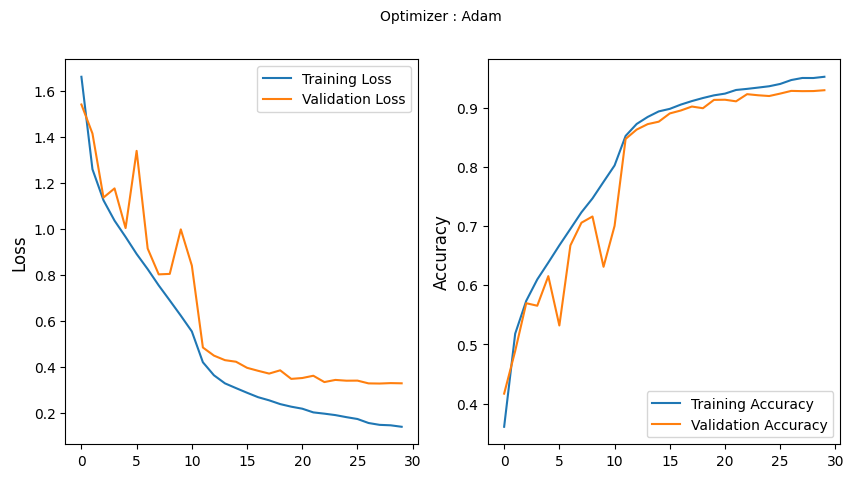

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

56/56 [==============================] - 8s 133ms/step


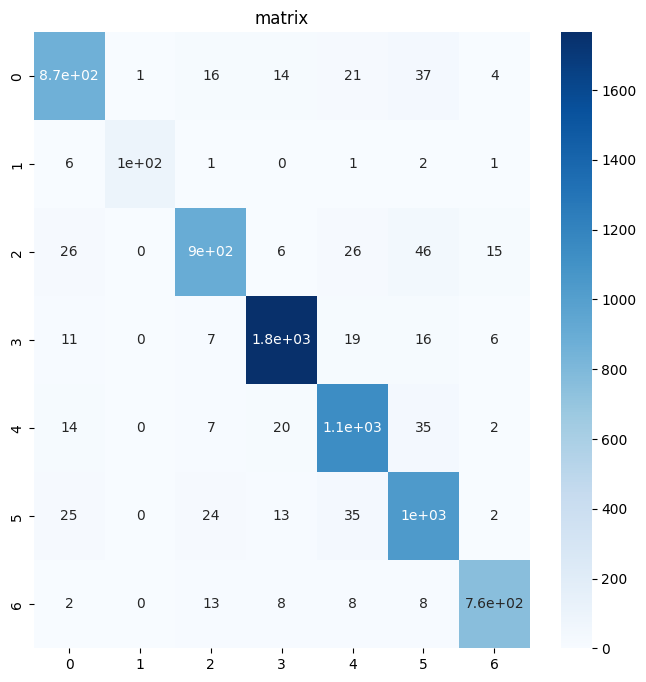

In [49]:
import seaborn as sns
plt.figure (figsize = [8,8])
y_true = test_set.classes
y_pred =  model.predict(test_set)
y_pred= tf.argmax(y_pred, axis = 1).numpy()
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title("matrix")
plt.show()


In [50]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       960
           1       0.99      0.90      0.94       111
           2       0.93      0.88      0.91      1018
           3       0.97      0.97      0.97      1825
           4       0.91      0.94      0.92      1216
           5       0.88      0.91      0.90      1139
           6       0.96      0.95      0.96       797

    accuracy                           0.93      7066
   macro avg       0.94      0.92      0.93      7066
weighted avg       0.93      0.93      0.93      7066



In [56]:
from keras.models import load_model

# Assuming 'model' is your Keras model
# Save the model to an HDF5 file
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy' ,'neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

1/1 [==============================] - 0s 31ms/step
[1.04542084e-01 1.24199141e-04 3.37859169e-02 2.66466830e-02
 5.47337113e-05 8.34766269e-01 8.01391579e-05]


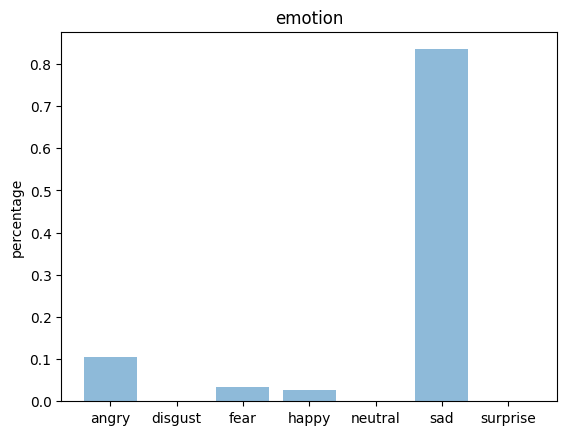

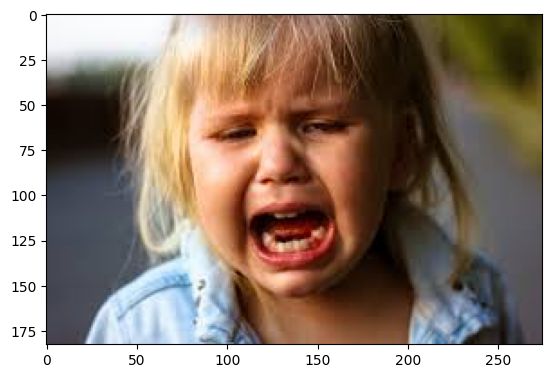

In [55]:
#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'images.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print (custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()